# AXL RNAseq analysis

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from msresist.pre_processing import preprocessing
from msresist.clustering import MassSpecClustering
from msresist.figures.figure2 import plotR2YQ2Y
from msresist.figures.figure1 import import_phenotype_data, formatPhenotypesForModeling
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
import numpy as np

In [74]:
# Set plotting format
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [26]:
eg = pd.read_csv("msresist/data/RNAseq/final-eigengenes.csv").set_index("Module")
memberships = pd.read_csv("msresist/data/RNAseq/final-membership.csv")

### Use MS data to predict Modules 

In [27]:
# Import siganling data
ms = preprocessing(AXLm_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)
ms = ms.rename(columns={"PC9 A":"WT", "KO A":"KO", "Kd A":"KDead", "KI A":"KI","M4 A": "Y634F", "M5 A":"Y643F", "M7 A":"Y698F", "M10 A":"Y726F", "M11 A":"Y750F", "M15 A":"Y821F"})
d = ms.select_dtypes(include=['float64']).T
i = ms.select_dtypes(include=['object'])

In [28]:
ddmc = MassSpecClustering(i, n_components=5, SeqWeight=2, distance_method="PAM250", random_state=5).fit(d)
centers = pd.DataFrame(ddmc.transform())
centers.index = d.index

In [31]:
egEA = eg.loc[:, eg.columns.str.contains("EA")]
egEA.insert(1, "KO", eg["KOE"])
egEA = egEA.rename(columns={"WTEA":"WT", "KDeEA":"KDead", "KIEA":"KI", "M4EA": "Y634F", "M5EA":"Y643F", "M7EA":"Y698F", "M10EA":"Y726F", "M11EA":"Y750F", "M15EA":"Y821F"})
egEA = egEA[list(centers.index)].T

In [83]:
egEA

Module,P13_I4_M2,P3_I10_M2,P4_I7_M10,P11_I6_M2,P5_I7_M2,P5_I7_M7,P3_I10_M11,P1_I25_M6,P3_I10_M13,P4_I7_M7,P5_I7_M1,P2_I7_M15,P2_I7_M11,P6_I6_M1,P2_I7_M28,...,P3_I10_M3,P15_I4_M4,P4_I7_M9,P3_I10_M14,P2_I7_M32,P3_I10_M12,P4_I7_M5,P6_I6_M8,P4_I7_M1,P12_I3_M4,P11_I6_M1,P3_I10_M8,P7_I5_M6,P16_I3_M1,P8_I4_M2
WT,-0.001549,-0.066058,0.036498,-0.010790,-0.110924,0.150542,-0.030766,-0.005733,0.370986,-0.093423,-0.028484,0.215691,0.007352,-0.032812,0.004633,...,0.075593,-0.036461,-0.234868,-0.004063,-0.002277,-0.008378,-0.114182,0.751782,0.070200,-0.065170,0.253517,-0.356988,0.576462,-0.145228,-0.081655
KO,0.011203,-0.153621,-0.088442,-0.050411,0.070896,-0.110610,-0.033986,-0.039584,-0.192759,-0.139975,0.263152,-0.130123,-0.025746,-0.002429,-0.032638,...,0.191267,0.019549,-0.157650,-0.043304,-0.055533,-0.020637,-0.062059,-0.039042,0.186746,-0.098922,0.296696,0.251433,-0.109316,-0.210425,-0.119998
KDead,0.086460,-0.178138,-0.024280,-0.040029,0.185909,0.072764,-0.009851,-0.026523,-0.192638,-0.087991,0.096978,-0.030316,-0.033007,0.129070,-0.016272,...,0.178815,0.014180,-0.192228,-0.030067,-0.034207,-0.037175,-0.146041,-0.068344,0.149424,-0.090946,0.233548,0.139686,0.005547,-0.178541,-0.119781
KI,0.010228,-0.186439,-0.018459,-0.106614,0.117814,-0.117786,-0.039070,-0.045114,0.019901,-0.109883,0.077299,-0.145797,-0.039606,0.283547,-0.041381,...,0.096149,0.050097,0.120267,-0.062118,-0.051905,-0.028941,-0.070503,-0.055214,0.112025,-0.138186,0.081063,0.138028,-0.126813,-0.149090,-0.114245
Y634F,0.154566,-0.123189,-0.042341,-0.097896,0.152915,0.109016,-0.049869,-0.066152,-0.012924,-0.099838,0.165835,-0.036225,-0.063085,0.171823,-0.062733,...,0.041399,0.237830,0.110443,-0.089711,-0.063709,-0.064093,-0.186899,-0.035209,0.185974,-0.086882,0.124669,0.062367,-0.095879,-0.016554,-0.167501
Y643F,-0.004529,-0.108143,0.012081,-0.109993,0.271855,0.448100,-0.065057,-0.068315,0.140259,-0.136663,0.008550,0.398509,-0.076614,0.088456,-0.063101,...,-0.020155,0.212272,0.237721,-0.078023,-0.054843,-0.059415,-0.116361,-0.084689,0.209548,-0.118623,0.198714,-0.016806,0.289551,-0.125042,-0.085584
Y698F,0.216186,-0.117689,-0.070531,-0.068916,0.053346,-0.170561,-0.021975,-0.060214,-0.135262,-0.069289,0.068387,-0.144979,0.977505,0.112092,-0.055349,...,0.132490,0.090271,-0.060372,-0.053283,-0.035263,-0.068669,-0.079955,-0.052024,0.025947,-0.127793,-0.046978,0.132648,-0.119213,-0.087331,-0.128891
Y726F,0.210330,-0.128747,0.966434,0.751265,0.011852,-0.132757,-0.035966,-0.047369,-0.216128,-0.004438,0.160997,-0.130574,-0.043753,0.064968,-0.040288,...,0.159073,0.104265,-0.176884,-0.038827,-0.052694,-0.052416,-0.108206,-0.058389,0.015023,-0.086495,-0.026027,0.184003,-0.137957,-0.037567,-0.129682
Y750F,0.242437,-0.141329,-0.051728,-0.056481,0.319216,0.275865,-0.022051,-0.034985,-0.091519,-0.120786,0.086309,0.058396,-0.061941,0.280613,-0.031594,...,0.101636,0.153911,-0.092887,-0.047569,0.970688,-0.042279,-0.054244,-0.094509,0.111754,-0.122381,-0.018102,0.105529,0.111034,-0.156381,-0.118462
Y821F,-0.089035,-0.128595,0.004494,-0.080070,0.372275,0.616765,-0.011919,-0.041726,0.099505,-0.087825,-0.069919,0.552288,-0.037129,0.134301,-0.031061,...,0.032464,0.080046,0.206635,-0.034036,0.074020,-0.039508,-0.080770,-0.069099,0.181119,-0.094992,0.224988,-0.021632,0.528172,-0.111973,-0.058392


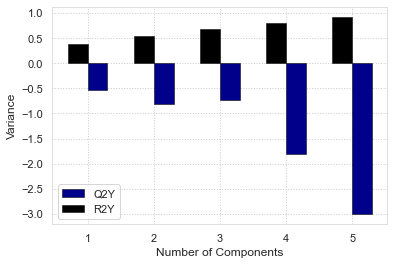

In [75]:
_, ax = plt.subplots(1, 1)
plotR2YQ2Y(ax, PLSRegression(n_components=2), egEA, centers, b=6, color="darkblue", title=False)

In [73]:
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import r2_score
reg = MultiTaskLassoCV(cv=10, eps=1e-5).fit(egEA, centers)
r2_score(centers, reg.predict(egEA))

0.3610502209158374

### Use Modules to predict Phenotypes

In [16]:
cv = import_phenotype_data(phenotype="Cell Viability")
red = import_phenotype_data(phenotype="Cell Death")
sw = import_phenotype_data(phenotype="Migration")
c = import_phenotype_data(phenotype="Island")
y = formatPhenotypesForModeling(cv, red, sw, c)
y = y[y["Treatment"] == "A/E"].drop("Treatment", axis=1).set_index("Lines")

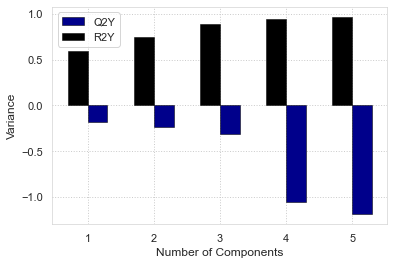

In [78]:
_, ax = plt.subplots(1, 1)
plotR2YQ2Y(ax, PLSRegression(n_components=2), egEA, y, b=6, color="darkblue", title=False)

In [79]:
reg = MultiTaskLassoCV(cv=10, eps=1e-5).fit(egEA, y)
r2_score(y, reg.predict(egEA))

0.3095208979628891